# <h5 style = 'font-size:45px'> <span style = 'color:yellow'> Link <span> </h5>
[Markdown꾸미기](https://leedakyeong.tistory.com/entry/Markdown-Jupyter-Notebook-%EC%A3%BC%ED%94%BC%ED%84%B0-%EB%85%B8%ED%8A%B8%EB%B6%81-%EB%A7%88%ED%81%AC%EB%8B%A4%EC%9A%B4-%EC%A0%95%EB%A6%AC)  
[Notion](https://gravel-turnover-821.notion.site/850bc7ba43a44299ae41bd4144d7462f)

<h5> <span style = 'color:blue'> Cow Project<span> </h5>

<img src = 'https://www.newsworks.co.kr/news/photo/202103/537213_423279_554.jpg' width = '500px' height ='300px' title = 'Cow project' alt = 'Error image'></img><br/>

In [9]:
# Using package
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# plot korean title
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
import statsmodels.api as sm

<h4> 파일에 존재하는 데이터 한꺼번에 불러오기 </h4>

In [10]:
os.chdir('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\2022-11-25근내지방 3계대')
os.getcwd()

'C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\2022-11-25근내지방 3계대'

In [11]:
# 파일이 존재하는 경로 불러오기 및 리스트
path = os.getcwd()
file_lst = os.listdir(path)# 파일 이름 담기
file_lst

['근내지방_0.xlsx',
 '근내지방_1.xlsx',
 '근내지방_10.xlsx',
 '근내지방_11.xlsx',
 '근내지방_12.xlsx',
 '근내지방_13.xlsx',
 '근내지방_14.xlsx',
 '근내지방_15.xlsx',
 '근내지방_16.xlsx',
 '근내지방_17.xlsx',
 '근내지방_2.xlsx',
 '근내지방_3.xlsx',
 '근내지방_4.xlsx',
 '근내지방_5.xlsx',
 '근내지방_6.xlsx',
 '근내지방_7.xlsx',
 '근내지방_8.xlsx',
 '근내지방_9.xlsx']

##### ↓ 반복문으로 파일 불러오면서, 하나의 DataFrame으로 합침 

In [12]:
df_3 = pd.DataFrame()
for i in file_lst:
    data_3 = pd.read_excel(path +'/'+i)
    df_3 = pd.concat([df_3, data_3])
    
df_3 = df_3.reset_index(drop = True)

In [13]:
# 데이터 확인
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532653 entries, 0 to 532652
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   이표번호            532653 non-null  int64  
 1   KPN             532653 non-null  object 
 2   성별              532653 non-null  object 
 3   출생일             532653 non-null  object 
 4   도축개월            532650 non-null  float64
 5   도축일             532653 non-null  object 
 6   등급              532653 non-null  object 
 7   도체중             532653 non-null  int64  
 8   등심단면적           532085 non-null  float64
 9   등지방두께           532123 non-null  float64
 10  근내지방도           531728 non-null  float64
 11  육색              532653 non-null  int64  
 12  지방색             532653 non-null  int64  
 13  성숙도             532653 non-null  int64  
 14  조직도             532653 non-null  int64  
 15  어미 이표번호         532653 non-null  int64  
 16  형매 도체중 평균       532653 non-null  float64
 17  형매 등심단면적 평

In [6]:
df_3.head()

,이표번호,KPN,성별,출생일,도축개월,도축일,등급,도체중,등심단면적,등지방두께,...,어미형매 등심단면적 평균,어미형매 등지방 평균,어미형매 근내지방 평균,어미형매 마릿수,외증조할미 이표번호,외할미형매 도체중 평균,외할미형매 등심단면적 평균,외할미형매 등지방 평균,외할미형매 근내지방 평균,외할미형매 마릿수
0,2146424082,KPN1233,암,2019-11-01,31.0,2022-05-23,1B,484,112.0,12.0,...,97.0,8.0,5.0,1,2078801406,427.25,86.75,15.00,2.75,4
1,2122073288,KPN946,거세,2017-09-30,30.0,2020-03-25,1+A,471,106.0,10.0,...,87.5,11.0,2.0,2,2016613635,386.00,87.25,20.50,5.50,4
2,2113675893,KPN1009,암,2016-12-17,71.0,2022-10-25,2B,407,82.0,13.0,...,81.2,11.2,4.4,5,162626314,363.40,76.40,14.00,5.00,5
3,2147230382,KPN1240,거세,2020-02-02,34.0,2022-11-21,1+B,554,96.0,13.0,...,85.0,16.5,4.5,2,196448808,347.67,87.00,10.33,5.67,3
4,2153357549,KPN1488,수,2020-06-03,24.0,2022-05-10,1A,356,69.0,7.0,...,95.5,9.0,4.5,2,192515207,368.57,87.14,9.57,3.29,7


<h5> 근내지방도 7,8,9 : 1, 나머지: 0 변환 </h5>

In [7]:
df_3.근내지방도.value_counts().sort_index()

1.0     16822
2.0     41856
3.0     45031
4.0     86311
5.0     62474
6.0    131721
7.0     57172
8.0     47055
9.0     43286
Name: 근내지방도, dtype: int64

In [8]:
cow_3 = df_3.copy()
cow_3['근내지방도'] = cow_3['근내지방도'].apply(lambda x: 1 if x >= 7 else 0 if x < 7 else x)
print(cow_3.근내지방도.value_counts())
print('\n')
cow_3.info()

0.0    384215
1.0    147513
Name: 근내지방도, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532653 entries, 0 to 532652
Data columns (total 33 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   이표번호            532653 non-null  int64  
 1   KPN             532653 non-null  object 
 2   성별              532653 non-null  object 
 3   출생일             532653 non-null  object 
 4   도축개월            532650 non-null  float64
 5   도축일             532653 non-null  object 
 6   등급              532653 non-null  object 
 7   도체중             532653 non-null  int64  
 8   등심단면적           532085 non-null  float64
 9   등지방두께           532123 non-null  float64
 10  근내지방도           531728 non-null  float64
 11  육색              532653 non-null  int64  
 12  지방색             532653 non-null  int64  
 13  성숙도             532653 non-null  int64  
 14  조직도             532653 non-null  int64  
 15  어미 이표번호         532653 non-null  int64  
 16  

<h5> 성별 프리마틴, 기타 미경산 제거</h5>

In [9]:
cow_3.성별.value_counts()

암             198319
수             172240
거세            161215
프리마틴             859
미경산               11
기타(프리마틴 등)         9
Name: 성별, dtype: int64

In [32]:
# target의 결측치 제거
cow_3.dropna(inplace=True)
cow_3.shape

(531721, 33)

In [33]:
c_c = cow_3.copy()
# indexNames = df[ (df['Price'] >= 30) & (df['Price'] <= 70) ].index
ind = c_c[(c_c['성별']=='프리마틴')|(c_c['성별']=='미경산')|(c_c['성별']=='기타(프리마틴 등)')].index
c_c.drop(ind, inplace=True)
print(cow_3.shape)
print(f'성별 제거할 행 개수:{len(ind)}')
print(c_c.shape)
print('\n')
print(c_c.성별.value_counts())

(531721, 33)
성별 제거할 행 개수:877
(530844, 33)


암     197662
수     172065
거세    161117
Name: 성별, dtype: int64


In [34]:
# 확인
c_c.head()

,이표번호,KPN,성별,출생일,도축개월,도축일,등급,도체중,등심단면적,등지방두께,...,어미형매 등심단면적 평균,어미형매 등지방 평균,어미형매 근내지방 평균,어미형매 마릿수,외증조할미 이표번호,외할미형매 도체중 평균,외할미형매 등심단면적 평균,외할미형매 등지방 평균,외할미형매 근내지방 평균,외할미형매 마릿수
0,2146424082,KPN1233,암,2019-11-01,31.0,2022-05-23,1B,484,112.0,12.0,...,97.0,8.0,5.0,1,2078801406,427.25,86.75,15.00,2.75,4
1,2122073288,KPN946,거세,2017-09-30,30.0,2020-03-25,1+A,471,106.0,10.0,...,87.5,11.0,2.0,2,2016613635,386.00,87.25,20.50,5.50,4
2,2113675893,KPN1009,암,2016-12-17,71.0,2022-10-25,2B,407,82.0,13.0,...,81.2,11.2,4.4,5,162626314,363.40,76.40,14.00,5.00,5
3,2147230382,KPN1240,거세,2020-02-02,34.0,2022-11-21,1+B,554,96.0,13.0,...,85.0,16.5,4.5,2,196448808,347.67,87.00,10.33,5.67,3
4,2153357549,KPN1488,수,2020-06-03,24.0,2022-05-10,1A,356,69.0,7.0,...,95.5,9.0,4.5,2,192515207,368.57,87.14,9.57,3.29,7


<h5> train_test_split, 7:3 </h5>

In [35]:
X_3 = c_c.drop(['근내지방도'],axis=1)
Y_3 = c_c.근내지방도
X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(X_3, Y_3, test_size=0.3, random_state = 7777)

<h5> 독립변수, 종속변수 합치기 나중에 데이터 불러오기 쉽게 </h5>

In [36]:
X_test_3.head()

,이표번호,KPN,성별,출생일,도축개월,도축일,등급,도체중,등심단면적,등지방두께,...,어미형매 등심단면적 평균,어미형매 등지방 평균,어미형매 근내지방 평균,어미형매 마릿수,외증조할미 이표번호,외할미형매 도체중 평균,외할미형매 등심단면적 평균,외할미형매 등지방 평균,외할미형매 근내지방 평균,외할미형매 마릿수
479827,2115671506,KPN1012,암,2017-03-26,29.0,2019-08-01,1A,309,89.0,12.0,...,82.38,11.88,4.25,8,182317033,394.9,86.70,13.90,4.70,10
212485,2098978583,KPN923,수,2015-05-26,33.0,2018-02-05,1+C,435,95.0,18.0,...,79.75,8.50,4.25,4,182979736,371.0,83.67,11.67,5.33,6
330849,2131393509,KPN1059,거세,2018-09-03,31.0,2021-03-08,1+B,470,98.0,14.0,...,107.60,13.60,6.20,5,191535367,418.0,81.00,16.50,4.00,2
209099,2112876195,KPN912,수,2016-09-27,36.0,2019-08-28,1B,459,95.0,11.0,...,90.67,14.67,6.00,3,169320056,401.5,85.50,14.25,5.25,4
439989,2119299118,KPN872,암,2017-06-26,50.0,2021-07-26,1+B,433,95.0,14.0,...,81.67,11.00,6.00,3,183681928,418.2,91.80,19.00,4.60,5


In [37]:
Y_test_3.head()

479827    0.0
212485    0.0
330849    0.0
209099    0.0
439989    0.0
Name: 근내지방도, dtype: float64

<h5> 값 다 같은 인덱스, 원래 같은 행이므로 이대로 합쳐도 원래 데이터 셋이 됨 </h5>

In [38]:
train_3 = pd.concat([X_train_3,Y_train_3], axis=1)
test_3 = pd.concat([X_test_3,Y_test_3], axis=1)

In [39]:
print(train_3.shape)
print(test_3.shape)

(371590, 33)
(159254, 33)


In [40]:
train_3.to_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\3계대 정리\\3_train.csv',encoding='cp949',index=False)
test_3.to_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\3계대 정리\\3_test.csv',encoding='cp949',index=False)
df_3.to_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\3계대 정리\\3_data_full.csv',encoding='cp949',index=False)

<h5> Logistic Regression </h5>

In [2]:
train_3 = pd.read_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\3계대 정리\\3_train.csv',encoding='cp949')
test_3 = pd.read_csv('C:\\Users\\Owner\\Desktop\\윤태준\\소\\윤태준_김다은\\3계대 정리\\3_test.csv',encoding='cp949')

In [41]:
train_3.head()

,이표번호,KPN,성별,출생일,도축개월,도축일,등급,도체중,등심단면적,등지방두께,...,어미형매 등지방 평균,어미형매 근내지방 평균,어미형매 마릿수,외증조할미 이표번호,외할미형매 도체중 평균,외할미형매 등심단면적 평균,외할미형매 등지방 평균,외할미형매 근내지방 평균,외할미형매 마릿수,근내지방도
346839,2069207019,KPN654,거세,2011-10-20,35.0,2014-09-02,1++C,437,85.0,19.0,...,11.00,3.75,4,184472655,286.50,66.50,7.50,1.00,2,1.0
70214,2109254264,KPN967,거세,2016-05-08,35.0,2019-03-25,1+A,438,110.0,7.0,...,14.00,5.50,6,2003505994,319.00,99.00,5.00,2.00,1,1.0
313439,2149556227,KPN1053,수,2020-03-20,28.0,2022-07-06,1++B,487,100.0,10.0,...,10.00,5.00,1,105572201,388.00,90.00,15.00,4.00,1,1.0
237325,2115913532,KPN995,암,2017-03-02,51.0,2021-05-24,1++B,362,86.0,12.0,...,11.67,3.67,6,185790956,316.67,78.17,12.17,2.67,6,1.0
48740,2144415304,KPN1124,수,2019-09-21,30.0,2022-03-02,1C,578,97.0,32.0,...,13.00,1.00,1,2003273693,347.00,72.00,6.00,3.00,1,0.0


In [42]:
print(train_3.근내지방도.unique())
print(test_3.근내지방도.unique())

[1. 0.]
[0. 1.]


In [43]:
train.columns

NameError: name 'train' is not defined

In [44]:
train_3 = train_3.astype({'근내지방도':'int64'})
train_3 = train_3.astype({'근내지방도':'category'})
train_3.dtypes
test_3 = test_3.astype({'근내지방도':'int64'})
test_3 = test_3.astype({'근내지방도':'category'})
test_3.dtypes

이표번호                 int64
KPN                 object
성별                  object
출생일                 object
도축개월               float64
도축일                 object
등급                  object
도체중                  int64
등심단면적              float64
등지방두께              float64
육색                   int64
지방색                  int64
성숙도                  int64
조직도                  int64
어미 이표번호              int64
형매 도체중 평균          float64
형매 등심단면적 평균        float64
형매 등지방 평균          float64
형매 근내지방 평균         float64
형매 마릿수               int64
외할미 이표번호             int64
어미형매 도체중 평균        float64
어미형매 등심단면적 평균      float64
어미형매 등지방 평균        float64
어미형매 근내지방 평균       float64
어미형매 마릿수             int64
외증조할미 이표번호           int64
외할미형매 도체중 평균       float64
외할미형매 등심단면적 평균     float64
외할미형매 등지방 평균       float64
외할미형매 근내지방 평균      float64
외할미형매 마릿수            int64
근내지방도             category
dtype: object

In [45]:
train_x = train_3.drop(['이표번호', 'KPN', '출생일', '도축일', '등급', '등심단면적',
       '등지방두께', '육색', '지방색', '성숙도', '조직도', '어미 이표번호', '외할미 이표번호',
       '외증조할미 이표번호', '근내지방도'],axis=1)
train_y = train_3['근내지방도']

In [46]:
test_3.columns

Index(['이표번호', 'KPN', '성별', '출생일', '도축개월', '도축일', '등급', '도체중', '등심단면적',
       '등지방두께', '육색', '지방색', '성숙도', '조직도', '어미 이표번호', '형매 도체중 평균',
       '형매 등심단면적 평균', '형매 등지방 평균', '형매 근내지방 평균', '형매 마릿수', '외할미 이표번호',
       '어미형매 도체중 평균', '어미형매 등심단면적 평균', '어미형매 등지방 평균', '어미형매 근내지방 평균',
       '어미형매 마릿수', '외증조할미 이표번호', '외할미형매 도체중 평균', '외할미형매 등심단면적 평균',
       '외할미형매 등지방 평균', '외할미형매 근내지방 평균', '외할미형매 마릿수', '근내지방도'],
      dtype='object')

In [47]:
test_x = test_3.drop(['이표번호', 'KPN', '출생일', '도축일', '등급', '등심단면적',
       '등지방두께', '육색', '지방색', '성숙도', '조직도', '어미 이표번호', '외할미 이표번호',
       '외증조할미 이표번호', '근내지방도'],axis=1)
test_y = test_3['근내지방도']

In [48]:
t_x = train_x.copy()
t_x = pd.get_dummies(t_x, columns=['성별'], drop_first=True)

te_x = test_x.copy()
te_x = pd.get_dummies(te_x, columns=['성별'], drop_first=True)

In [49]:
print(train_y.unique())
print(test_y.unique())

[1, 0]
Categories (2, int64): [0, 1]
[0, 1]
Categories (2, int64): [0, 1]


In [50]:
model = sm.Logit(train_y, t_x)

In [51]:
results = model.fit(method='newton')
pr_y = results.predict(te_x)
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.392327
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  근내지방도   No. Observations:               371590
Model:                          Logit   Df Residuals:                   371571
Method:                           MLE   Df Model:                           18
Date:                Fri, 27 Jan 2023   Pseudo R-squ.:                  0.3356
Time:                        14:46:39   Log-Likelihood:            -1.4578e+05
converged:                       True   LL-Null:                   -2.1941e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
도축개월              -0.0192      0.001    -34.953      0.000      -0.020      -0.018
도체중              

In [52]:
print(f'0.5보다 작은 것 개수:{len(pr_y[pr_y>0.5])}')
print(f'0.5보다 큰 것 개수:{len(pr_y[pr_y<=0.5])}')

0.5보다 작은 것 개수:35201
0.5보다 큰 것 개수:124053


In [53]:
pr_y[pr_y>0.5]

330849    0.759061
335402    0.939709
49593     0.615539
382966    0.526006
295193    0.508098
            ...   
1031      0.581018
239214    0.608716
325737    0.962415
274452    0.689344
170709    0.513256
Length: 35201, dtype: float64

In [54]:
pr_y[pr_y<=0.5]

479827    0.384133
212485    0.065023
209099    0.328494
439989    0.039812
99814     0.202010
            ...   
461757    0.029411
400257    0.439751
82397     0.048109
26520     0.272583
458939    0.396945
Length: 124053, dtype: float64

In [55]:
pr_y = pr_y.apply(lambda x: 1 if x > 0.5 else 0 )
pr_y.value_counts()

0    124053
1     35201
dtype: int64

<h5> 성과지표 </h5>

In [56]:
print(classification_report(test_y, pr_y, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.85      0.92      0.88    115131
     class 1       0.72      0.58      0.64     44123

    accuracy                           0.82    159254
   macro avg       0.79      0.75      0.76    159254
weighted avg       0.81      0.82      0.82    159254



AUC: 0.7464898235006716


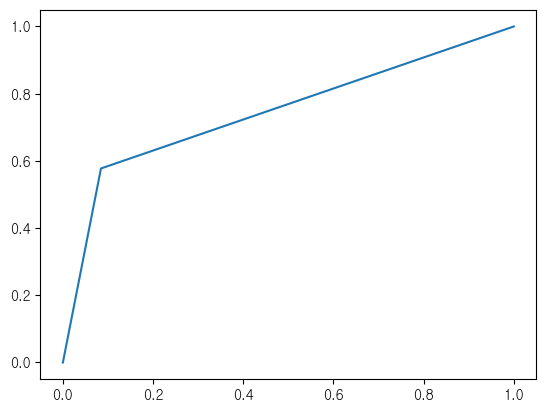

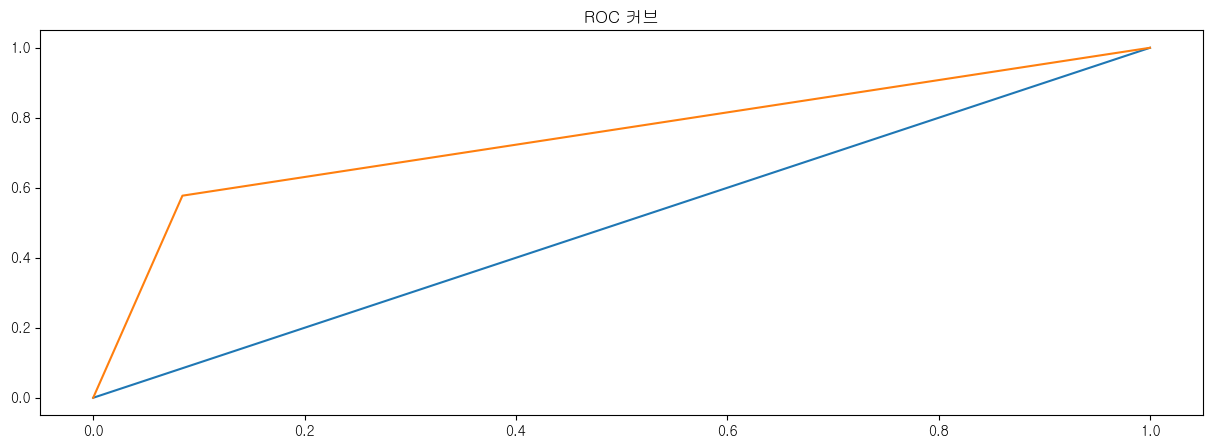

In [57]:
import sklearn.metrics as metrics

# sklearn에서 ROC 패키지 활용
fpr, tpr, thresholds = metrics.roc_curve(test_y, pr_y,pos_label = 1)

# ROC curve
plt.plot(fpr,tpr)

# AUC
auc = np.trapz(tpr,fpr)
print("AUC:",auc)


plt.figure(figsize=(15, 5))

plt.plot([0,1], [0, 1], label='STR')
plt.title('ROC 커브')
plt.plot(fpr, tpr, label='ROC')
plt.show()

##### chatGPT code 

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD

In [2]:
import tensorflow.keras as tk
mnist = tk.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
# Preprocess the data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
x_train /= 255
x_test /= 255

In [4]:
# Convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [5]:
# Build the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [6]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=SGD(), metrics=['accuracy'])

In [7]:
# Train the model
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4805 - accuracy: 0.8674 - val_loss: 0.2288 - val_accuracy: 0.9328
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2189 - accuracy: 0.9350 - val_loss: 0.1710 - val_accuracy: 0.9512
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1656 - accuracy: 0.9519 - val_loss: 0.1416 - val_accuracy: 0.9572
Epoch 4/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1349 - accuracy: 0.9593 - val_loss: 0.1262 - val_accuracy: 0.9619
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.1138 - accuracy: 0.9663 - val_loss: 0.1109 - val_accuracy: 0.9663
Epoch 6/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0993 - accuracy: 0.9706 - val_loss: 0.0968 - val_accuracy: 0.9707
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0881 - accuracy: 0.9731 - val_loss: 0.0849 -

In [8]:
# Evaluate the model
score = model.evaluate(x_test, y_test, batch_size=32)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0693 - accuracy: 0.9777
Test loss: 0.06932095438241959
Test accuracy: 0.9776999950408936
